Dimensioni del dataset: (429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed              

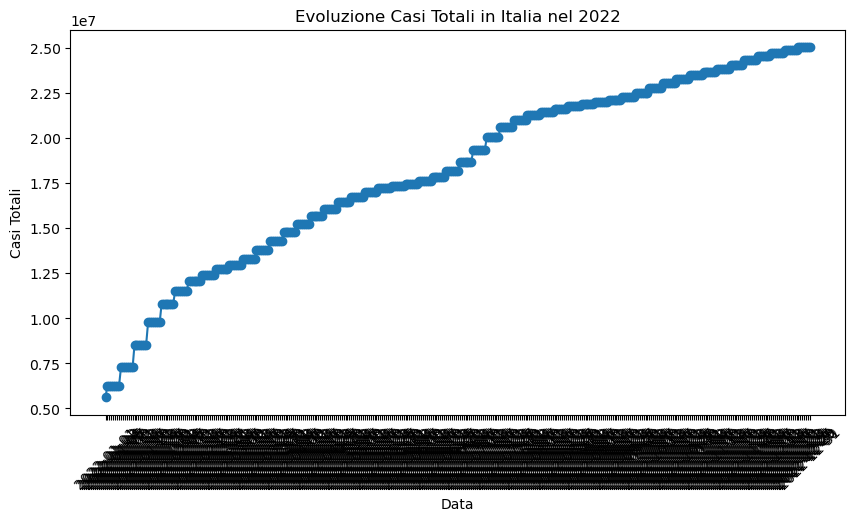

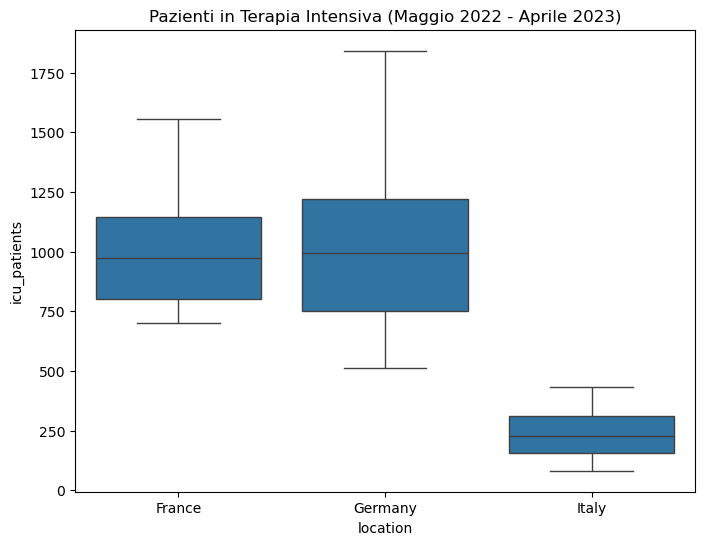


Totale pazienti ospedalizzati nel 2021 per paese:
location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64

Dati mancanti dopo la pulizia:
location              0
hosp_patients    362254
dtype: int64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Caricare il dataset
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# 2. Esplorazione generale del dataset
print(f"Dimensioni del dataset: {df.shape}")  # Numero righe e colonne
df.info()  # Tipi di dati
print(df.head())  # Prime righe

# 3. Analisi delle colonne 'continent' e 'location'
print("\nValori unici in 'continent':")
print(df['continent'].unique())

print("\nEsempi di valori in 'location':")
print(df['location'].unique()[:20])  # Mostriamo i primi 20 valori unici

# Separiamo dati aggregati e dettagliati
df_aggregati = df[df['continent'].isna()]  # Dati aggregati (es. World, Europe)
df_dettagliati = df[df['continent'].notna()]  # Dati puntuali per singoli paesi

print("\nNumero di righe con dati aggregati (senza continente):", df_aggregati.shape[0])
print("Numero di righe con dati dettagliati (con continente):", df_dettagliati.shape[0])

# 4. Analisi delle colonne 'new_cases' e 'total_cases'
print("\nStatistiche descrittive di 'new_cases' e 'total_cases':")
print(df[['new_cases', 'total_cases']].describe())

# Controllo valori nulli
print("\nDati mancanti in 'new_cases' e 'total_cases':")
print(df[['new_cases', 'total_cases']].isna().sum())

# Controlliamo se 'new_cases' è coerente con 'total_cases'
df_sorted = df.sort_values(by=['location', 'date'])
df_sorted['check'] = df_sorted.groupby('location')['total_cases'].diff() - df_sorted['new_cases']
print("\nControllo coerenza 'new_cases' vs 'total_cases':")
print(df_sorted['check'].value_counts(dropna=False).head(10))

# Pulizia dati
df_clean = df_dettagliati.copy()  # Consideriamo solo i dati dettagliati
df_clean[['new_cases', 'total_cases']] = df_clean[['new_cases', 'total_cases']].fillna(0)  # Riempiamo NaN con 0

# 5. Analisi per continente
continent_cases = df_clean.groupby('continent')['total_cases'].max()
total_world_cases = df_clean['total_cases'].max()
continent_percentage = (continent_cases / total_world_cases) * 100
print("\nNumero massimo di casi per continente:")
print(continent_cases)
print("\nPercentuale di casi per continente rispetto al mondo:")
print(continent_percentage)

# 6. Selezione dati Italia 2022
italy_2022 = df_clean[(df_clean['location'] == 'Italy') & 
                      (df_clean['date'].between('2022-01-01', '2022-12-31'))]
italy_2022 = italy_2022.dropna(subset=['new_cases'])

# 7. Grafico evoluzione casi totali in Italia
plt.figure(figsize=(10,5))
plt.plot(italy_2022['date'], italy_2022['total_cases'], marker='o')
plt.xticks(rotation=45)
plt.title('Evoluzione Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.show()

# 8. Boxplot ICU per Italia, Germania, Francia
icu_data = df_clean[(df_clean['location'].isin(['Italy', 'Germany', 'France'])) & 
                    (df_clean['date'].between('2022-05-01', '2023-04-30'))]
plt.figure(figsize=(8,6))
sns.boxplot(x='location', y='icu_patients', data=icu_data)
plt.title('Pazienti in Terapia Intensiva (Maggio 2022 - Aprile 2023)')
plt.show()

# 9. Somma pazienti ospedalizzati nel 2021
hosp_2021 = df_clean[(df_clean['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) &
                     (df_clean['date'].between('2021-01-01', '2021-12-31'))]
hosp_totals = hosp_2021.groupby('location')['hosp_patients'].sum()
print("\nTotale pazienti ospedalizzati nel 2021 per paese:")
print(hosp_totals)

# 10. Controllo finale dati nulli
missing_data = df_clean[['location', 'hosp_patients']].isna().sum()
print("\nDati mancanti dopo la pulizia:")
print(missing_data)